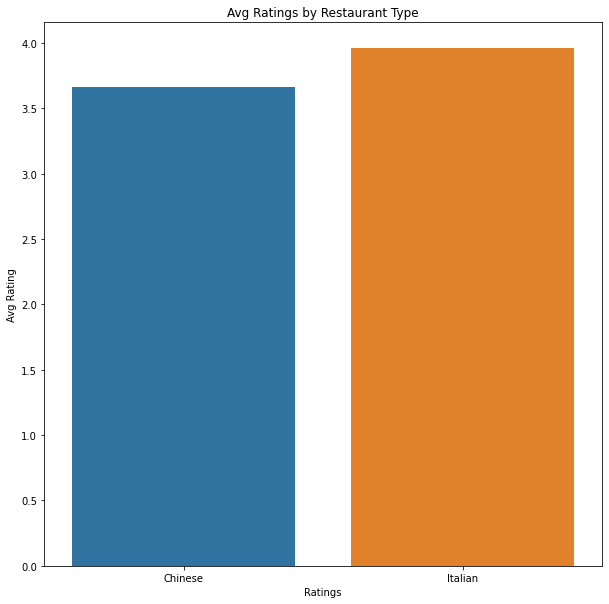

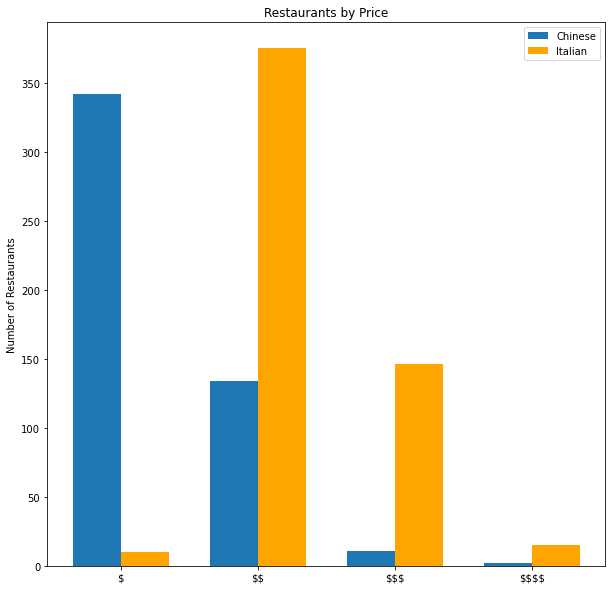

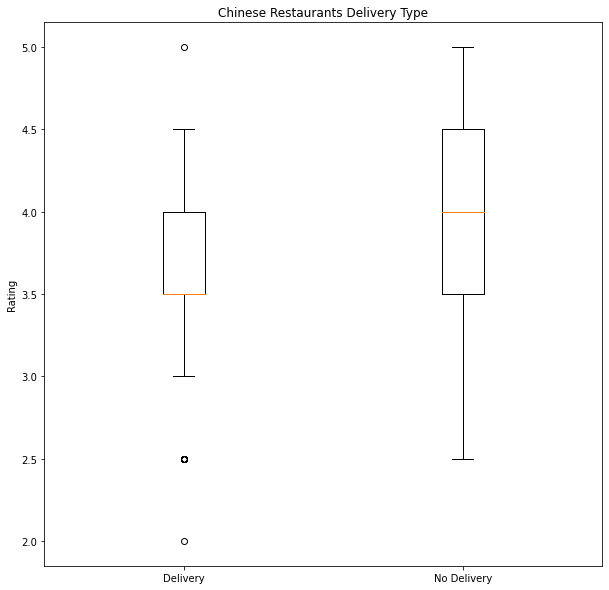

In [1]:
"""
The following code was used to craft the visualizations for this project.
"""

#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importing the data
restaurant = pd.read_csv('../Data/Restaurant.csv')



#RESTAURANT BY RATING BAR GRAPH

avg_ratings = list(restaurant.groupby("Type")['Ratings'].mean().values)

rounded_ratings = [round(rating, 2) for rating in avg_ratings]

fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=list(restaurant.groupby("Type")['Ratings'].mean().index), 
                 y=rounded_ratings, data = restaurant.groupby("Type")['Ratings'].mean())
ax.set_xticklabels(['Chinese', 'Italian'])
ax.set_ylabel('Avg Rating')
ax.set_title('Avg Ratings by Restaurant Type')
plt.savefig('avg_rating_by_type.png')


#RESTAURANT BY PRICE BAR GRAPH

by_price = restaurant.groupby(['Price', 'Type'])['Business Id'].count().unstack()

labels = ["$","\$\$",'\$\$\$','\$\$\$\$']

x = np.arange(len(labels))
width=.35 

fig, ax = plt.subplots(figsize=(10,10))
chinese = ax.bar(x - width/2, by_price['Chinese'].values, width, label = 'Chinese')
italian = ax.bar(x + width/2, by_price['Italian'].values, width, label = 'Italian', color = 'orange')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Restaurants by Price')
ax.set_xticks(list(range(4)))
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('restaurants_by_price.png')
plt.show()



#DELIVERY BOX PLOTS

#splitting the data into separate categories for easy manipulation
chinese_restaurants = restaurant[restaurant['Type'] == 'Chinese']

fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot([chinese_restaurants[chinese_restaurants['Delivery']==True]['Ratings'], chinese_restaurants[chinese_restaurants['Delivery']==False]['Ratings']])
ax.set_xticklabels(['Delivery', 'No Delivery'])
ax.set_ylabel('Rating')
ax.set_title('Chinese Restaurants Delivery Type')
plt.savefig('chinese_delivery_and_rating.png')
plt.show()



#RESTAURANT MAPS

#Chinese

import folium

restaurant_list =  [list(x) for x in zip(chinese_restaurants['Latitude'].values,
                                         chinese_restaurants['Longitude'].values,
                                         chinese_restaurants['Business Name'].values,
                                         chinese_restaurants['Type'].values)] 

nyc_map = folium.Map(location=[40.7589, -73.9851], zoom_start = 14)

def markers(iterables, nyc_map):
    """
    This function creates markers with popup labels and adds them to the map
    of NYC for a visual reference of restaurant locations
    """
    markers = list(map(lambda iterable: folium.Marker(location = iterable[:2],
                                                      popup = f'{iterable[2]}: {iterable[3]}'), iterables))
    for marker in markers:
        marker.add_to(nyc_map)
    
    return nyc_map

Chinese_Restaurant_Map = markers(restaurant_list, nyc_map)

Chinese_Restaurant_Map.save('Chinese_Restaurant_Map.html')


